##Project Introduction

# Project Introduction: Diabetes Health Indicators Dataset Notebook

#Purpose:
The primary objective of this code notebook is to preprocess the Behavioral Risk Factor Surveillance System (BRFSS) data, specifically focusing on health indicators related to diabetes. With an initial dataset comprising 330 features, this notebook aims to streamline the data into a format suitable for machine learning algorithms. The selection of features is informed by extensive research on factors influencing diabetes and other chronic health conditions, ensuring a targeted and relevant analysis.

##Dataset Details:
The dataset under consideration is derived from 253,680 survey responses obtained from the cleaned BRFSS 2015. This project adopts a binary classification approach, emphasizing the presence or absence of diabetes as the main outcome variable.

##Important Risk Factors:
Research in the field has identified several pivotal risk factors for diabetes and chronic illnesses, including high blood pressure, cholesterol, smoking, obesity, age, sex, race, diet, exercise, alcohol consumption, BMI, household income, marital status, sleep, time since last checkup, education, and health care coverage.

##Subset of Selected Features:
In alignment with the recognized risk factors, a careful curation of features from the BRFSS 2015 dataset has been undertaken. The selection process involves cross-referencing the variable names in the dataset with the BRFSS 2015 Codebook to ensure accuracy and relevance. Additionally, inspiration is drawn from the work of Zidian Xie et al, who employed a similar approach for building risk prediction models for Type 2 Diabetes using the 2014 BRFSS dataset. This project thus contributes to the ongoing efforts in leveraging machine learning techniques for health risk assessment.

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.htm

The selected features from the BRFSS 2015 dataset are:

#The dependent variable, DIABETES12:  
 Encapsulates the diabetes status of respondents in three distinct categories. A value of 0 denotes the absence of diabetes or its occurrence solely during pregnancy. A value of 1 signifies a diagnosis of pre-diabetes or borderline diabetes. On the other hand, a value of 2 indicates a confirmed diagnosis of diabetes. This variable serves as a crucial indicator for understanding the diverse diabetes statuses present in the dataset, encompassing those without the condition, individuals with pre-diabetic indications, and those diagnosed with diabetes.



#Several independent variables are considered:
##High Blood Pressure (_RFHYPE5):    

Adults who have been informed by a doctor, nurse, or health professional that they have high blood pressure.

##High Cholesterol (TOLDHI2, _CHOLCHK):

Have you ever been informed by a doctor, nurse, or health professional that your blood cholesterol is high? (TOLDHI2)
Cholesterol check within the past five years. (_CHOLCHK)
##BMI (Body Mass Index) (_BMI5):
Body Mass Index (BMI) is considered as an indicator of weight status.

##Smoking (SMOKE100):
Whether the respondent has smoked at least 100 cigarettes in their entire life.

##Other Chronic Health Conditions:

Ever told you had a stroke (CVDSTRK3).
Respondents ever reporting having coronary heart disease (CHD) or myocardial infarction (MI) (_MICHD).
Physical Activity (_TOTINDA):
Adults who reported engaging in physical activity or exercise during the past 30 days other than their regular job.

##Diet:

Consume fruit 1 or more times per day (_FRTLT1).

Consume vegetables 1 or more times per day (_VEGLT1).

Alcohol Consumption (_RFDRHV5):
Identification of heavy drinkers based on defined criteria.

##Health Care:

Do you have any kind of health care coverage, including health insurance, prepaid plans, or government plans? (HLTHPLN1)
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (MEDCOST)
Health General and Mental Health:

##General health assessment (GENHLTH).
Mental health status, considering stress, depression, and emotional problems in the past 30 days (MENTHLTH).

Physical health status, including illness and injury in the past 30 days (PHYSHLTH).

Serious difficulty walking or climbing stairs (DIFFWALK).
Demographics:

##Sex of the respondent (SEX).
Fourteen-level age category (_AGEG5YR).

Highest grade or year of school completed (EDUCA).

Annual household income from all sources (INCOME2), with a code for refusal if applicable.





##Imports

Importing the necessary libraries.

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# plot tree model
import graphviz

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV, KFold
from patsy import dmatrices

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support



# Plot missing values
import missingno as msno

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Regular expressions
import re

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import uniform, randint

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Logistic function
from scipy.special import expit

##The Data

This project utilizes the data set `2015.csv`.

The dataset comprises information concerning the health status of each individual, indicating potential future occurrences of diabetes.

`Diabetes_012`
Occurrence of Diabetes

`HighBP`
The blood pressure is above normal levels

`HighChol`
The cholestrol is above normal levels

`CholCheck`
The Cholestrol levels being checked once every 5 years

`BMI`
The Body Mass Index

`Smoker`
Have smoked atleast 100 cigarettes in their entire life

`Stroke`
Ever had a stroke

`HeartDiseaseorAttack`
coronary heart disease(CHD) or myocardial infarction (MI)

`PhysActivity`
Physical activity in the past 30 days - not including job

`Fruits`
Consumes fruits once or more times per day

`Veggies`
Consumes veggies once or more times per day

`HvyAlcoholConsump`
Adult men >=14 drinks per week

Adult women >=7 drinks per week

`AnyHealthcare`
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.

`NoDocbcCost`
Was there a time in the past 12 months when needed to see a doctor but could not because of cost

`GenHlth`
Rate general health

1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

`MentHlth`
days of poor mental health scale 1-30 days

`PhysHlth`
physical illness or injury days in past 30 days

`DiffWalk`
Serious difficulty while walking or climbing stairs?

`Sex`
Gender

`Age`
1 = (18-24), 9 = (60-64), 13 = (80 or older)

`Education`
Education level on scale 1-6

1 = Never attended school or only kindergarten, 2 = elementary etc.

`Income`
Income on scale 1-8

 1 = less than $10000

 8 = $75000 or more

##Questions for the problem

The overall problem is to predict the occurence of diabetes based on health attributes of the person. To answer this general problem, we are asking specific questions about the data.

##### $\rightarrow$ Questions about the data that will help you solve the problem.

*   What are the number of predicting variables and how many observations do we have?
*   Can these variables help us answer the question of occurence of diabetes?
*   What variables shouldn't be considered for this to be a meaningful study?
*   Are there any duplicate rows or missing values?
*   What shall the values of the variable we are trying to predict be?
*   What prediction variables are highly correlated with the output variable?
*   Do we have any outliers in this data?
*   What models shall we use to predict the output?
*   Are there any additional external factors  that may influence the chances of diabetes?

##Load the data

##### $\rightarrow$ Loading the Diabetes 2015 dataset.
https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/input?select=2015.csv

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/umuhoza90/DS-Project/main/diabetes_012_health_indicators_BRFSS2015.csv')

# Exploring the contents of the data sets


Exploring the dataset. We can see the names of the columns and how do the values look like.

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


To get the summary of the DataFrame. Also gives the data types of each column and the number of non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Number of rows and columns in our dataset.

In [6]:
df.shape

(253680, 22)

## Can we answer the questions using this data?

#####Performing exploratory data analysis to determine whether the data are sufficient to answer our question.

Checking what variables can we consider to plot a pair plot.

In [7]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


To explore the relationships between the numerical variables, we are plotting a pair plot.

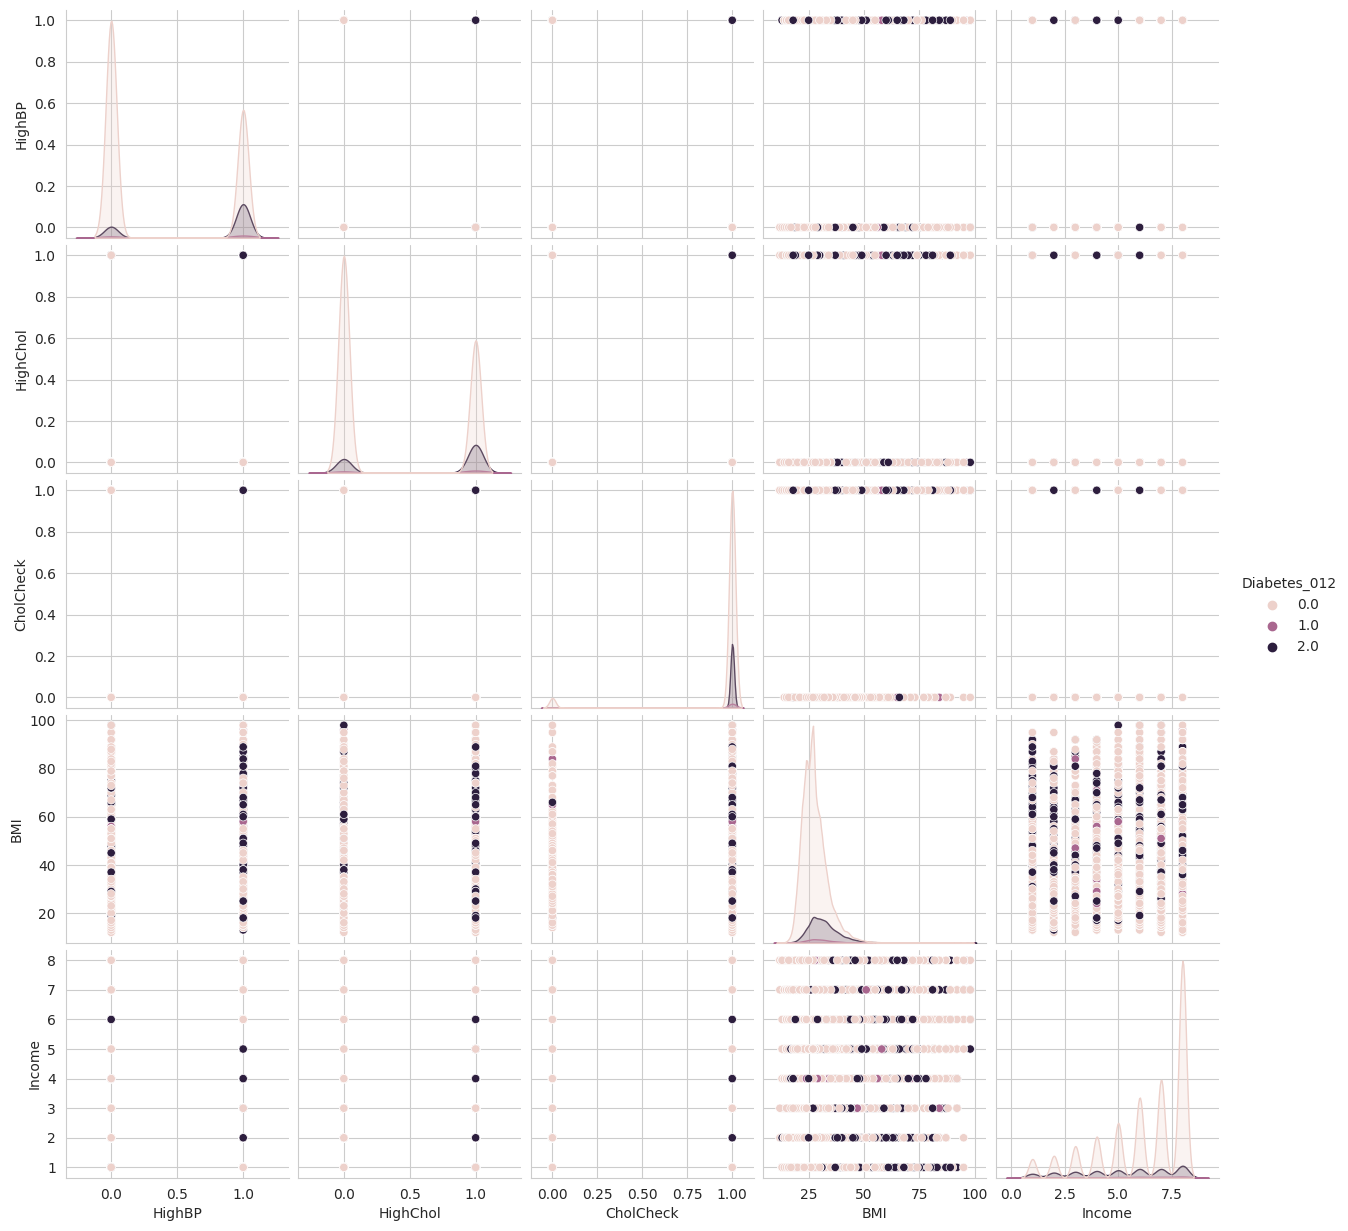

In [8]:
sns.pairplot(data = df.iloc[:, np.r_[np.arange(5), 21]], hue='Diabetes_012');

# Data preparation

## Quality control

There are no out-of-range values, the values are divided by various properties.

## Checking missing values

In [9]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Checking duplicate rows

In [10]:
df.duplicated().sum()

23899

Dropping the duplicate rows

In [11]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Renaming the columns from CamelCase to snake_case

Looking at the column names.

In [12]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Using this method to convert the column names from CamelCase to snake_case.

In [13]:
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()
    return re.sub('(.)([0-9][a-z]+)', r'\1_\2', name)

In [14]:
df.columns = [camel_to_snake(name) for name in df.columns]

Checking the converted column names.

In [15]:
df.columns

Index(['diabetes_012', 'high_bp', 'high_chol', 'chol_check', 'bmi', 'smoker',
       'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits',
       'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',
       'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age',
       'education', 'income'],
      dtype='object')

Selecting some relatable variables.

In [16]:
df = df[['diabetes_012', 'high_bp', 'high_chol', 'bmi', 'smoker',
       'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'no_docbc_cost', 'gen_hlth','any_healthcare',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income']]

Rename Diabetes_012 column to Diabetes

In [17]:
df['diabetes'] = df['diabetes_012']
df.drop(columns = 'diabetes_012', inplace=True)

<ipython-input-17-24bc023986ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diabetes'] = df['diabetes_012']


Frequency count for each column value

In [18]:
for column in df.columns:
    print(f"{column}\n{df[column].value_counts()}\n{'-'*90}")

high_bp
0.0    125359
1.0    104422
Name: high_bp, dtype: int64
------------------------------------------------------------------------------------------
high_chol
0.0    128273
1.0    101508
Name: high_chol, dtype: int64
------------------------------------------------------------------------------------------
bmi
27.0    21551
26.0    17808
24.0    16537
28.0    14933
25.0    14809
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: bmi, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
smoker
0.0    122781
1.0    107000
Name: smoker, dtype: int64
------------------------------------------------------------------------------------------
phys_activity
1.0    168511
0.0     61270
Name: phys_activity, dtype: int64
------------------------------------------------------------------------------------------
fruits
1.0    140848
0.0     88933
Name: fruits, dtype: int64
-------------------

# Exploratory Data Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'high_bp'),
  Text(1, 0, 'high_chol'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'smoker'),
  Text(4, 0, 'phys_activity'),
  Text(5, 0, 'fruits'),
  Text(6, 0, 'veggies'),
  Text(7, 0, 'hvy_alcohol_consump'),
  Text(8, 0, 'no_docbc_cost'),
  Text(9, 0, 'gen_hlth'),
  Text(10, 0, 'any_healthcare'),
  Text(11, 0, 'ment_hlth'),
  Text(12, 0, 'phys_hlth'),
  Text(13, 0, 'diff_walk'),
  Text(14, 0, 'sex'),
  Text(15, 0, 'age'),
  Text(16, 0, 'education'),
  Text(17, 0, 'income'),
  Text(18, 0, 'diabetes')])

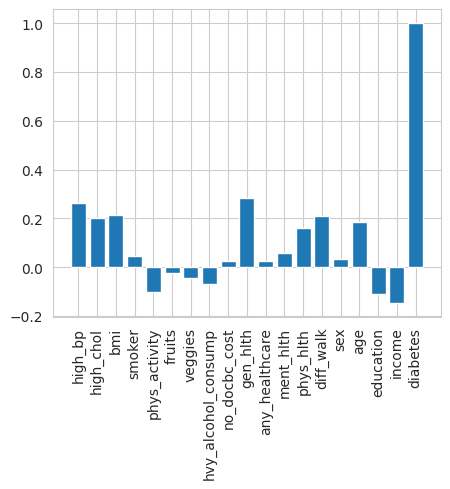

In [19]:
# Looking at correlation to diabetes only
plt.figure(figsize=(5, 4))
df.corr("pearson")["diabetes"]
fig2 = plt.bar(
    df.corr("pearson")["diabetes"].index, df.corr("pearson")["diabetes"]
)
plt.xticks(rotation=90)

2.2 Enhance and preprocess the values to align more effectively with machine learning algorithms. To accomplish this task, we consulted the codebook, which provides detailed information about each column, feature, or question. You can find the codebook here: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

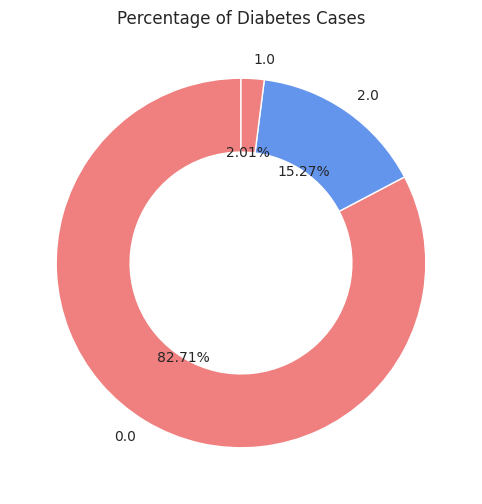

In [20]:
plt.figure(figsize=(10, 6))

# Count occurrences of each category in the 'diabetes' column
diabetes_counts = df['diabetes'].value_counts()

# Plotting the pie chart
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.2f%%', colors=['lightcoral', 'cornflowerblue'], startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Adding a title
plt.title('Percentage of Diabetes Cases')

# Display the pie chart
plt.show()

*  0 = No diabetes or only during pregnancy (82.71%)
* 1 = Pre-diabetes or borderline diabetes (2.01%)
* 2 = Yes, diabetes (15.27%)

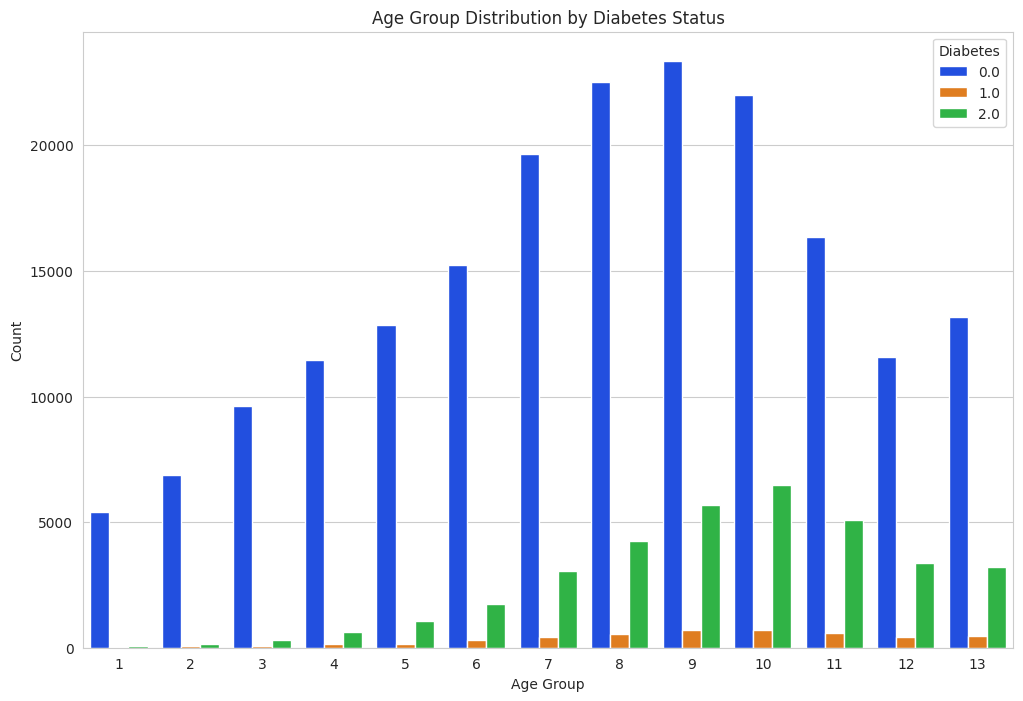

In [21]:

plt.figure(figsize=(12, 8))

# Order the x-axis by age group
age_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Plotting the countplot
sns.countplot(x='age', data=df, hue='diabetes', order=age_order, palette='bright')

# Adding a title and labels
plt.title('Age Group Distribution by Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Adding legend and adjusting its position
plt.legend(title='Diabetes', loc='upper right')

# Display the countplot
plt.show()


The countplot illustrates the relationship between age and diabetes, revealing that elderly individuals face an elevated risk of developing diabetes.

In [22]:
#diabetics individuals
Diabetics = df[df['diabetes'] == 2].copy()


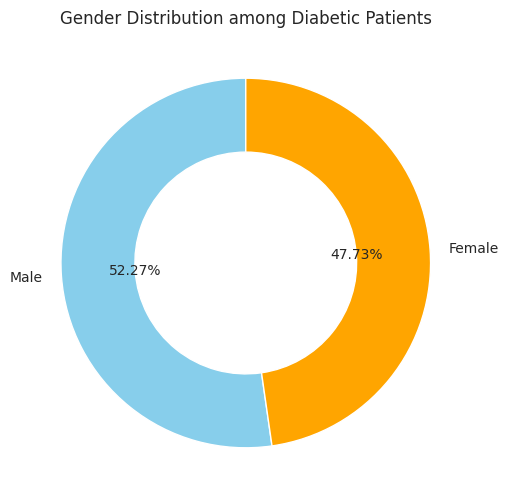

In [23]:
plt.figure(figsize=(10, 6))

# Count occurrences of each gender in the diabetic patients
gender_counts = Diabetics['sex'].value_counts()

# Plotting the pie chart with explicit labels
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.2f%%', colors=['skyblue', 'orange'], startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Adding a title
plt.title('Gender Distribution among Diabetic Patients')

# Display the pie chart
plt.show()

The pie chart illustrates that there isn't a pronounced correlation between gender and diabetes

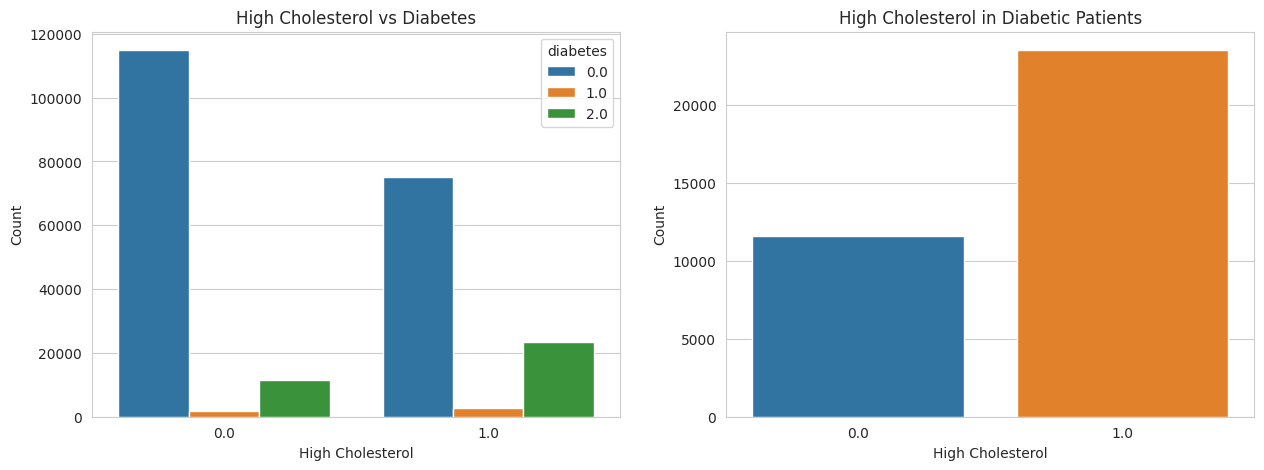

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot HighChol vs. Diabetes in the entire dataset
sns.countplot(x='high_chol', data=df, hue='diabetes', ax=ax[0]).set_title('High Cholesterol vs Diabetes')

# Plot HighChol in Diabetic patients
sns.countplot(x='high_chol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetic Patients')

# Add common labels
for axes in ax:
    axes.set_xlabel('High Cholesterol')
    axes.set_ylabel('Count')

plt.show()


The countplots reveal a correlation between high cholesterol and diabetes. Among individuals with diabetes, 20,000+ have high cholesterol, while 10,000+ do not.






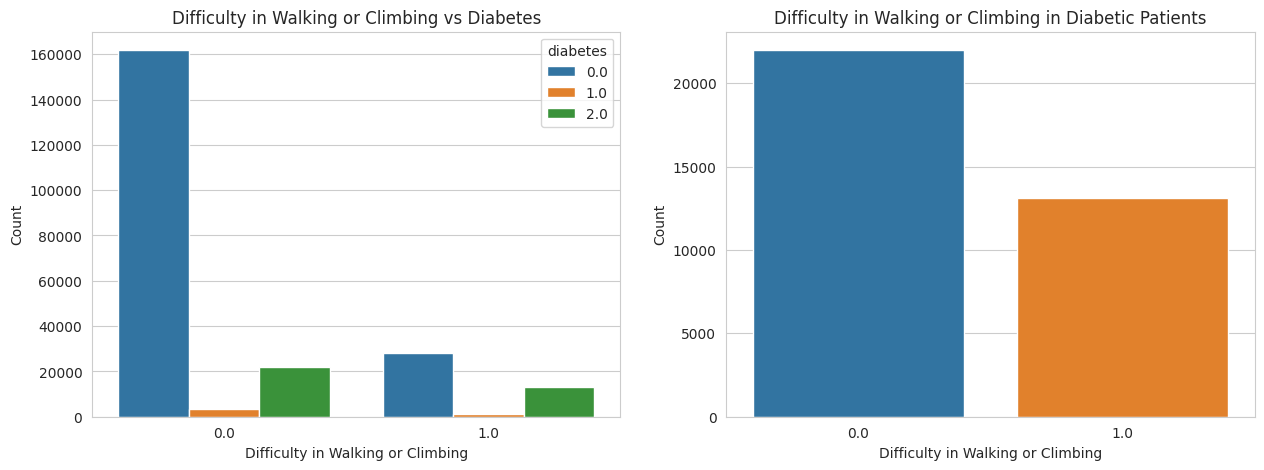

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot DiffWalk vs. Diabetes in the entire dataset
sns.countplot(x='diff_walk', data=df, hue='diabetes', ax=ax[0]).set_title('Difficulty in Walking or Climbing vs Diabetes')

# Plot DiffWalk in Diabetic patients
sns.countplot(x='diff_walk', data=Diabetics, ax=ax[1]).set_title('Difficulty in Walking or Climbing in Diabetic Patients')

# Add common labels
for axes in ax:
    axes.set_xlabel('Difficulty in Walking or Climbing')
    axes.set_ylabel('Count')

plt.show()


Within the subset of individuals diagnosed with diabetes, around 13,114 individuals report experiencing difficulty in walking or climbing. Conversely,around 21,983 individuals within this diabetic group do not encounter challenges related to walking or climbing.

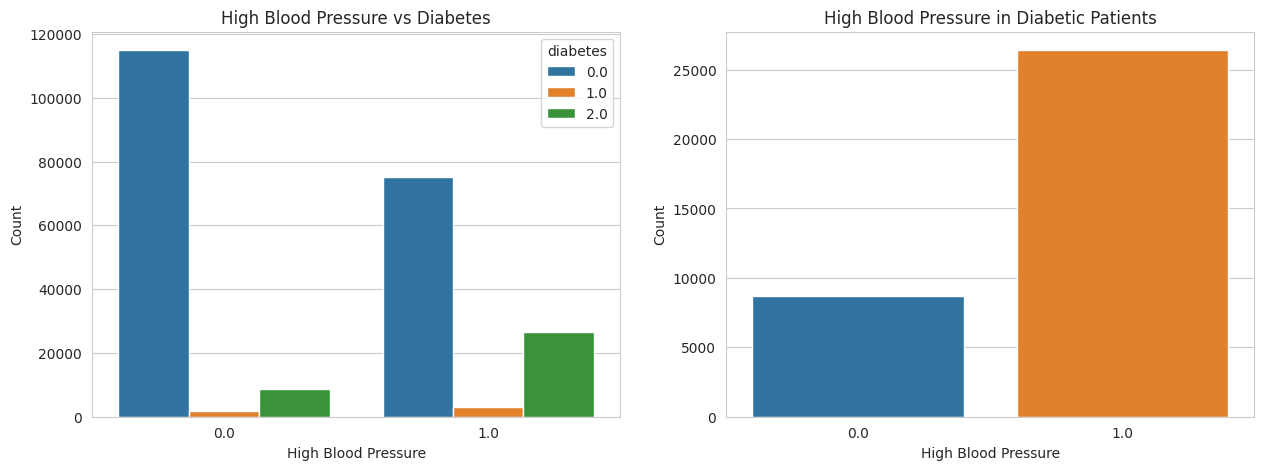

In [26]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot HighBP vs. Diabetes in the entire dataset
sns.countplot(x='high_bp', data=df, hue='diabetes', ax=ax[0]).set_title('High Blood Pressure vs Diabetes')

# Plot HighBP in Diabetic patients
sns.countplot(x='high_bp', data=Diabetics, ax=ax[1]).set_title('High Blood Pressure in Diabetic Patients')

# Add common labels
for axes in ax:
    axes.set_xlabel('High Blood Pressure')
    axes.set_ylabel('Count')

plt.show()

The countplot demonstrates a correlation between high blood pressure and diabetes. Among individuals with diabetes, over 26]5,000 have high blood pressure, while around  8,000 do not exhibit high blood pressure."

([<matplotlib.axis.XTick at 0x7c8632569e40>,
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Fair'),
  Text(4, 0, 'Poor')])

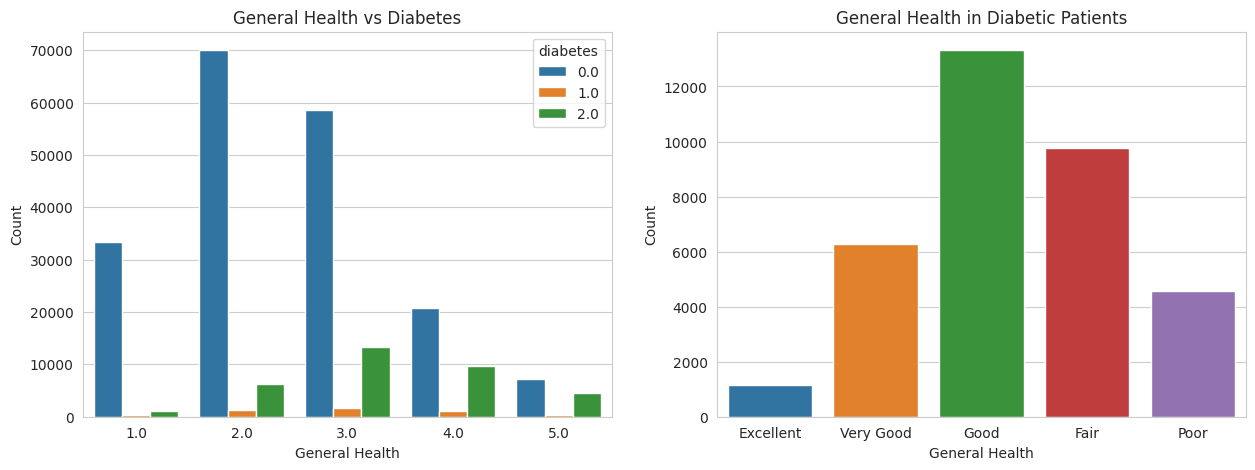

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot GenHlth vs. Diabetes in the entire dataset
sns.countplot(x='gen_hlth', data=df, hue='diabetes', ax=ax[0]).set_title('General Health vs Diabetes')

# Plot GenHlth in Diabetic patients
sns.countplot(x='gen_hlth', data=Diabetics, ax=ax[1]).set_title('General Health in Diabetic Patients')

# Add common labels
for axes in ax:
    axes.set_xlabel('General Health')
    axes.set_ylabel('Count')

# Adding custom x-axis labels
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])


The countplots offer a clear insight into the relationship between General Health and diabetes. Notably, individuals categorized with 'good,' 'fair,' and 'poor' health types exhibit a heightened risk of developing diabetes. The distribution of counts in these health categories is as follows:

* Good Health: about 13,000individuals
* Fair Health: about 9,000 individuals
* Very Good Health: abut 6,000 individuals
* Poor Health: about 4,000 individuals
* Excellent Health: around 1,000 individuals

This suggests a discernible association between lower perceived general health and an increased likelihood of diabetes.

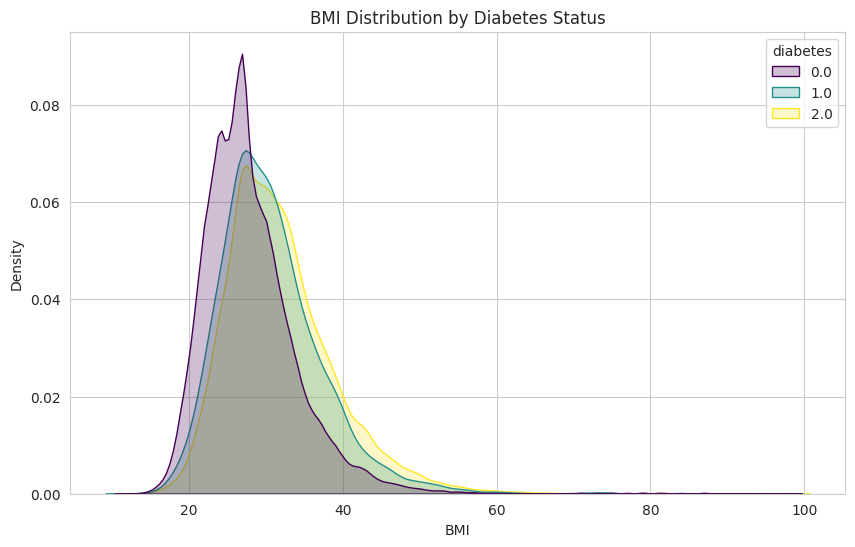

In [28]:
#Diabetes and BMI

plt.figure(figsize=(10, 6))

# Create a Kernel Density Estimate (KDE) plot for BMI and Diabetes
sns.kdeplot(data=df, x="bmi", hue="diabetes", fill=True, common_norm=False, palette='viridis')

# Adding a title and labels
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')

# Display the KDE plot
plt.show()


The BMI distribution is more concentrated among individuals with diabetes compared to those without diabetes. The graph shows that the BMI in  Non-diabetic individuals exhibit a normal BMI within the range of 25-35, while diabetic patients tend to have a BMI that extends beyond this range.


In [29]:
df.drop(columns=['diabetes']).agg(['min', 'max']).T

,min,max
high_bp,0.0,1.0
high_chol,0.0,1.0
bmi,12.0,98.0
smoker,0.0,1.0
phys_activity,0.0,1.0
fruits,0.0,1.0
veggies,0.0,1.0
hvy_alcohol_consump,0.0,1.0
no_docbc_cost,0.0,1.0
gen_hlth,1.0,5.0


Produce a train/test split for model comparison

Train test split

In [30]:
X = df.drop(columns = ['phys_activity', 'fruits', 'veggies', 'hvy_alcohol_consump', 'education', 'income', 'diabetes'])

y = df['diabetes']

In [31]:
X.head()

,high_bp,high_chol,bmi,smoker,no_docbc_cost,gen_hlth,any_healthcare,ment_hlth,phys_hlth,diff_walk,sex,age
0,1.0,1.0,40.0,1.0,0.0,5.0,1.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,25.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,28.0,0.0,1.0,5.0,1.0,30.0,30.0,1.0,0.0,9.0
3,1.0,0.0,27.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,24.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,11.0


In [32]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: diabetes, dtype: float64

In [33]:
class_names = ['no diabetes', 'yes diabetes']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

In [35]:
print(X_train.shape, X_test.shape)

(183824, 12) (45957, 12)


In [36]:
X_train.agg(['mean','std']).round(2).T

,mean,std
high_bp,0.45,0.50
high_chol,0.44,0.50
bmi,28.69,6.78
smoker,0.47,0.50
no_docbc_cost,0.09,0.29
gen_hlth,2.60,1.07
any_healthcare,0.95,0.23
ment_hlth,3.52,7.74
phys_hlth,4.68,9.05
diff_walk,0.19,0.39


In [37]:
X_test.agg(['mean','std']).round(2).T

,mean,std
high_bp,0.45,0.50
high_chol,0.44,0.50
bmi,28.68,6.81
smoker,0.47,0.50
no_docbc_cost,0.09,0.29
gen_hlth,2.60,1.06
any_healthcare,0.95,0.22
ment_hlth,3.44,7.62
phys_hlth,4.66,9.04
diff_walk,0.19,0.39


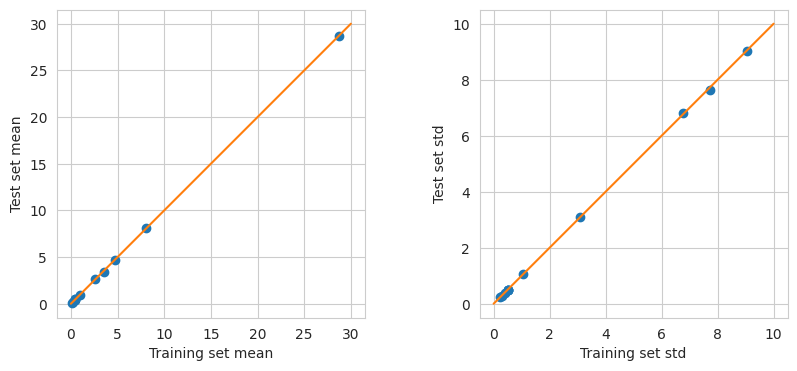

In [38]:
plt.subplots(1,2, figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(X_train.mean(), X_test.mean(), 'o')
plt.plot([0, 30], [0, 30])

plt.xlabel('Training set mean')
plt.ylabel('Test set mean')
plt.axis('square')

plt.subplot(1,2,2)
plt.plot(X_train.std(), X_test.std(), 'o')
plt.plot([0, 10], [0, 10])

plt.xlabel('Training set std')
plt.ylabel('Test set std')
plt.axis('square');

In [39]:
df['diabetes'].value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: diabetes, dtype: int64

In [40]:
y_train.value_counts(normalize=True)

0.0    0.826546
2.0    0.153457
1.0    0.019997
Name: diabetes, dtype: float64

In [41]:
y_test.value_counts(normalize=True)

0.0    0.829384
2.0    0.149879
1.0    0.020737
Name: diabetes, dtype: float64

In [42]:
numerical_columns = X_train.select_dtypes(include='number').columns.to_list()

In [43]:
scaler = StandardScaler().fit(X_train[numerical_columns])

In [44]:
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [45]:
print(np.mean(X_train[numerical_columns], axis = 0).round(2))
print(np.std(X_train[numerical_columns], axis = 0))

print(np.mean(X_test[numerical_columns], axis = 0).round(2))
print(np.std(X_test[numerical_columns], axis = 0).round(2))

high_bp           0.0
high_chol         0.0
bmi               0.0
smoker           -0.0
no_docbc_cost    -0.0
gen_hlth         -0.0
any_healthcare    0.0
ment_hlth         0.0
phys_hlth        -0.0
diff_walk        -0.0
sex               0.0
age              -0.0
dtype: float64
high_bp           1.0
high_chol         1.0
bmi               1.0
smoker            1.0
no_docbc_cost     1.0
gen_hlth          1.0
any_healthcare    1.0
ment_hlth         1.0
phys_hlth         1.0
diff_walk         1.0
sex               1.0
age               1.0
dtype: float64
high_bp          -0.00
high_chol         0.00
bmi              -0.00
smoker            0.00
no_docbc_cost     0.00
gen_hlth         -0.00
any_healthcare    0.00
ment_hlth        -0.01
phys_hlth        -0.00
diff_walk         0.00
sex               0.01
age               0.01
dtype: float64
high_bp           1.00
high_chol         1.00
bmi               1.01
smoker            1.00
no_docbc_cost     1.00
gen_hlth          1.00
any_healthcar

In [46]:
#sns.pairplot(data = df.iloc[:,np.r_[np.arange(6), 21]], hue='diabetes');

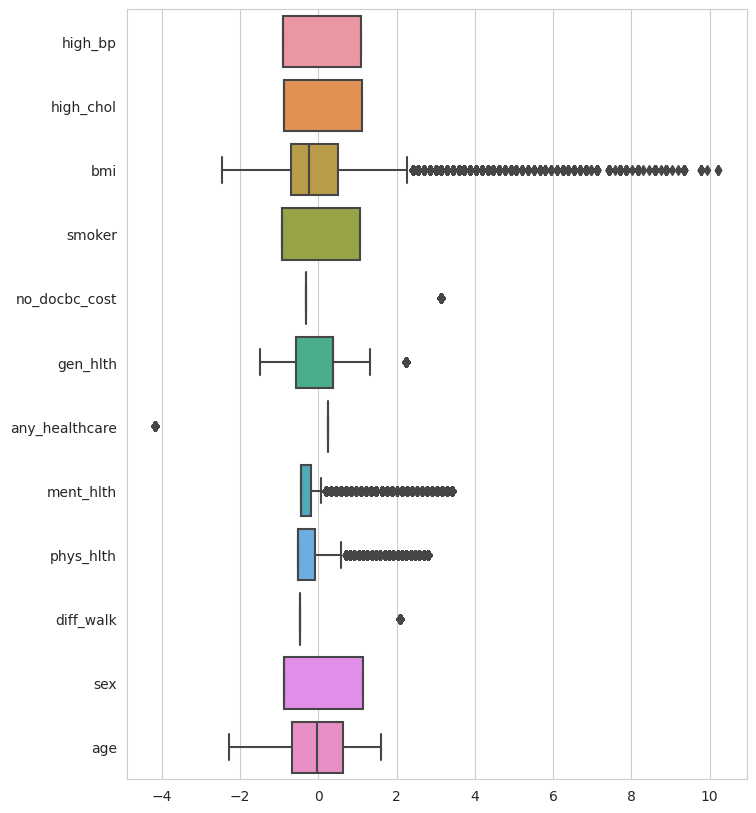

In [47]:
plt.figure(figsize=(8,10))
sns.boxplot(data=X_train, orient='h');


MODELING


* Decision Tree Regression
* Logistic Regression
*  Quadratic Regression


In [48]:

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_reg_pred)

# Logistic Regression (for binary classification)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_mse = mean_squared_error(y_test, log_reg_pred)

# Quadratic Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_pred)



In [49]:
from sklearn.metrics import precision_recall_fscore_support

# Convert continuous to binary for each class
dt_reg_pred_binary = (dt_reg_pred > 0.5).astype(int)
log_reg_pred_binary = (log_reg_pred > 0.5).astype(int)
poly_pred_binary = (poly_pred > 0.5).astype(int)

# Calculate additional classification metrics for each model
dt_metrics = precision_recall_fscore_support(y_test, dt_reg_pred_binary, pos_label=2)
log_reg_metrics = precision_recall_fscore_support(y_test, log_reg_pred_binary, pos_label=2)
quad_reg_metrics = precision_recall_fscore_support(y_test, poly_pred_binary, pos_label=2)

# Print the classification metrics for diabetes (Class 2)
print("Decision Tree Classification Metrics for Diabetes (Class 2):")
print("  Precision:", dt_metrics[0][0])
print("  Recall:", dt_metrics[1][0])
print("  F1 Score:", dt_metrics[2][0])

print("\nLogistic Regression Classification Metrics for Diabetes (Class 2):")
print("  Precision:", log_reg_metrics[0][0])
print("  Recall:", log_reg_metrics[1][0])
print("  F1 Score:", log_reg_metrics[2][0])

print("\nQuadratic Regression Classification Metrics for Diabetes (Class 2):")
print("  Precision:", quad_reg_metrics[0][0])
print("  Recall:", quad_reg_metrics[1][0])
print("  F1 Score:", quad_reg_metrics[2][0])


Decision Tree Classification Metrics for Diabetes (Class 2):
  Precision: 0.8677880664073202
  Recall: 0.8310420820652744
  F1 Score: 0.8490176632983998

Logistic Regression Classification Metrics for Diabetes (Class 2):
  Precision: 0.8471057429352781
  Recall: 0.975207262042187
  F1 Score: 0.9066539831211279

Quadratic Regression Classification Metrics for Diabetes (Class 2):
  Precision: 0.9065843263460033
  Recall: 0.8203641515374122
  F1 Score: 0.8613219111104989


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels 

##Interpretation:

For precision, Quadratic Regression has the highest score, indicating that when it predicts diabetes cases, it's accurate.

For recall, Logistic Regression has the highest score, suggesting it is good at capturing most of the actual positive cases.
F1 Score combines precision and recall; Logistic Regression has the highest F1 Score, indicating a good balance between precision and recall.

##Conclusion :
The Logistic Regression model stands out as the best performer for predicting diabetes (Class 2) with the highest F1 Score of 0.9064. This indicates a good balance between precision and recall, making it a reliable model for identifying individuals with diabetes. While the Decision Tree and Quadratic Regression models also show strong performance, the Logistic Regression model excels in achieving both high precision and recall, making it the preferred choice for this specific classification task.